# DeepLabCut Toolbox - demo for post processing

https://github.com/AlexEMG/DeepLabCut

In [1]:
# Importing the toolbox (takes several seconds)
import pandas as pd
from pathlib import Path
import numpy as np
import os
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'

/Users/hunglo/anaconda3/envs/dlc-macOS-CPU/lib/python3.6/site-packages/matplotlib/__init__.py:1038: UserWarning: Bad val "qt5" on line #1
	"backend: qt5
"
	in file "/Users/hunglo/.matplotlib/matplotlibrc"
	Key backend: Unrecognized backend string 'qt5': valid strings are ['GTK3Agg', 'GTK3Cairo', 'MacOSX', 'nbAgg', 'Qt4Agg', 'Qt4Cairo', 'Qt5Agg', 'Qt5Cairo', 'TkAgg', 'TkCairo', 'WebAgg', 'WX', 'WXAgg', 'WXCairo', 'agg', 'cairo', 'pdf', 'pgf', 'ps', 'svg', 'template']
  (val, error_details, msg))


In [2]:
# One example video from Hung's
video='DSC7674200224.wmv'
DLCscorer='DLC_resnet50_SatiationOct16shuffle1_160000'

dataname = str(Path(video).stem) + DLCscorer + '.h5'

#loading output of DLC
Dataframe = pd.read_hdf('/Users/hunglo/Desktop/DSC7674200224DLC_resnet50_SatiationOct16shuffle1_160000.h5')

In [3]:
#Let's have a look at the data:

#these structures are awesome to manipulate, how -->> see pandas https://pandas.pydata.org/pandas-docs/stable/index.html
Dataframe.head()

scorer    DLC_resnet50_SatiationOct16shuffle1_160000                         \
bodyparts                                    LeftEar                          
coords                                             x           y likelihood   
0                                         682.683044  337.612366   0.997115   
1                                         682.173828  337.610779   0.998183   
2                                         683.939331  340.512939   0.532816   
3                                         686.520691  333.688080   0.049739   
4                                         679.789185  332.640106   0.043048   

scorer                                                                \
bodyparts    RightEar                          Miniscope               
coords              x           y likelihood           x           y   
0          680.618591  350.545471   0.999555  695.858398  340.231567   
1          678.854370  354.782532   0.998324  694.096069  341.325745   
2          672.899536  355.485474   0.733944  705.479492  340.202362   
3          673.955444  332.849487   0.174576  690.153931  331.557190   
4          661.087708  333.597900   0.561160  675.183289  327.369598   

scorer                                                               \
bodyparts               TailBase                        LickSpout_1   
coords    likelihood           x           y likelihood           x   
0           0.986051  622.039612  366.781952   0.999998  168.757339   
1           0.974571  620.032104  366.031921   0.999998  169.074341   
2           0.034137  618.369568  366.487122   0.999997  168.082535   
3           0.003271  619.897522  367.325012   0.999998  168.251297   
4           0.013541  616.557922  366.714539   0.999997  168.796844   

scorer                                                               
bodyparts                        LickSpout_2                         
coords              y likelihood           x           y likelihood  
0          366.013550   0.999997  169.279037  266.019653   0.999990  
1          365.890503   0.999997  169.176453  266.034119   0.999994  
2          365.640259   0.999994  169.228226  265.898743   0.999993  
3          365.784821   0.999994  169.316177  265.817841   0.999989  
4          365.497040   0.999993  169.103271  265.851257   0.999994

In [4]:
# The plotting functions below are put here for simplicity and so that the user can edit them. Note that they 
# (or variants thereof) are in fact in standard DLC and accessible via:

import deeplabcut
deeplabcut.utils.plotting.PlottingResults?

/Users/hunglo/anaconda3/envs/dlc-macOS-CPU/lib/python3.6/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


In [5]:
def get_cmap(n, name='hsv'):
    return plt.cm.get_cmap(name, n)

def Histogram(vector,color,bins):
    dvector=np.diff(vector)
    dvector=dvector[np.isfinite(dvector)]
    plt.hist(dvector,color=color,histtype='step',bins=bins)

def PlottingResults(Dataframe,bodyparts2plot,alphavalue=.2,pcutoff=.5,colormap='jet',fs=(4,3)):
    ''' Plots poses vs time; pose x vs pose y; histogram of differences and likelihoods.'''
    plt.figure(figsize=fs)
    colors = get_cmap(len(bodyparts2plot),name = colormap)
    scorer=Dataframe.columns.get_level_values(0)[0] #you can read out the header to get the scorer name!

    for bpindex, bp in enumerate(bodyparts2plot):
        Index=Dataframe[scorer][bp]['likelihood'].values > pcutoff
        plt.plot(Dataframe[scorer][bp]['x'].values[Index],Dataframe[scorer][bp]['y'].values[Index],'.',color=colors(bpindex),alpha=alphavalue)

    plt.gca().invert_yaxis()

    sm = plt.cm.ScalarMappable(cmap=plt.get_cmap(colormap), norm=plt.Normalize(vmin=0, vmax=len(bodyparts2plot)-1))
    sm._A = []
    cbar = plt.colorbar(sm,ticks=range(len(bodyparts2plot)))
    cbar.set_ticklabels(bodyparts2plot)
    #plt.savefig(os.path.join(tmpfolder,"trajectory"+suffix))
    plt.figure(figsize=fs)
    Time=np.arange(np.size(Dataframe[scorer][bodyparts2plot[0]]['x'].values))

    for bpindex, bp in enumerate(bodyparts2plot):
        Index=Dataframe[scorer][bp]['likelihood'].values > pcutoff
        plt.plot(Time[Index],Dataframe[scorer][bp]['x'].values[Index],'--',color=colors(bpindex),alpha=alphavalue)
        plt.plot(Time[Index],Dataframe[scorer][bp]['y'].values[Index],'-',color=colors(bpindex),alpha=alphavalue)

    sm = plt.cm.ScalarMappable(cmap=plt.get_cmap(colormap), norm=plt.Normalize(vmin=0, vmax=len(bodyparts2plot)-1))
    sm._A = []
    cbar = plt.colorbar(sm,ticks=range(len(bodyparts2plot)))
    cbar.set_ticklabels(bodyparts2plot)
    plt.xlabel('Frame index')
    plt.ylabel('X and y-position in pixels')
    #plt.savefig(os.path.join(tmpfolder,"plot"+suffix))

    plt.figure(figsize=fs)
    for bpindex, bp in enumerate(bodyparts2plot):
        Index=Dataframe[scorer][bp]['likelihood'].values > pcutoff
        plt.plot(Time,Dataframe[scorer][bp]['likelihood'].values,'-',color=colors(bpindex),alpha=alphavalue)

    sm = plt.cm.ScalarMappable(cmap=plt.get_cmap(colormap), norm=plt.Normalize(vmin=0, vmax=len(bodyparts2plot)-1))
    sm._A = []
    cbar = plt.colorbar(sm,ticks=range(len(bodyparts2plot)))
    cbar.set_ticklabels(bodyparts2plot)
    plt.xlabel('Frame index')
    plt.ylabel('likelihood')

    #plt.savefig(os.path.join(tmpfolder,"plot-likelihood"+suffix))

    plt.figure(figsize=fs)
    bins=np.linspace(0,np.amax(Dataframe.max()),100)

    for bpindex, bp in enumerate(bodyparts2plot):
        Index=Dataframe[scorer][bp]['likelihood'].values < pcutoff
        X=Dataframe[scorer][bp]['x'].values
        X[Index]=np.nan
        Histogram(X,colors(bpindex),bins)
        Y=Dataframe[scorer][bp]['x'].values
        Y[Index]=np.nan
        Histogram(Y,colors(bpindex),bins)

    sm = plt.cm.ScalarMappable(cmap=plt.get_cmap(colormap), norm=plt.Normalize(vmin=0, vmax=len(bodyparts2plot)-1))
    sm._A = []
    cbar = plt.colorbar(sm,ticks=range(len(bodyparts2plot)))
    cbar.set_ticklabels(bodyparts2plot)
    plt.ylabel('Count')
    plt.xlabel('DeltaX and DeltaY')
    
    #plt.savefig(os.path.join(tmpfolder,"hist"+suffix))

<IPython.core.display.Javascript object>


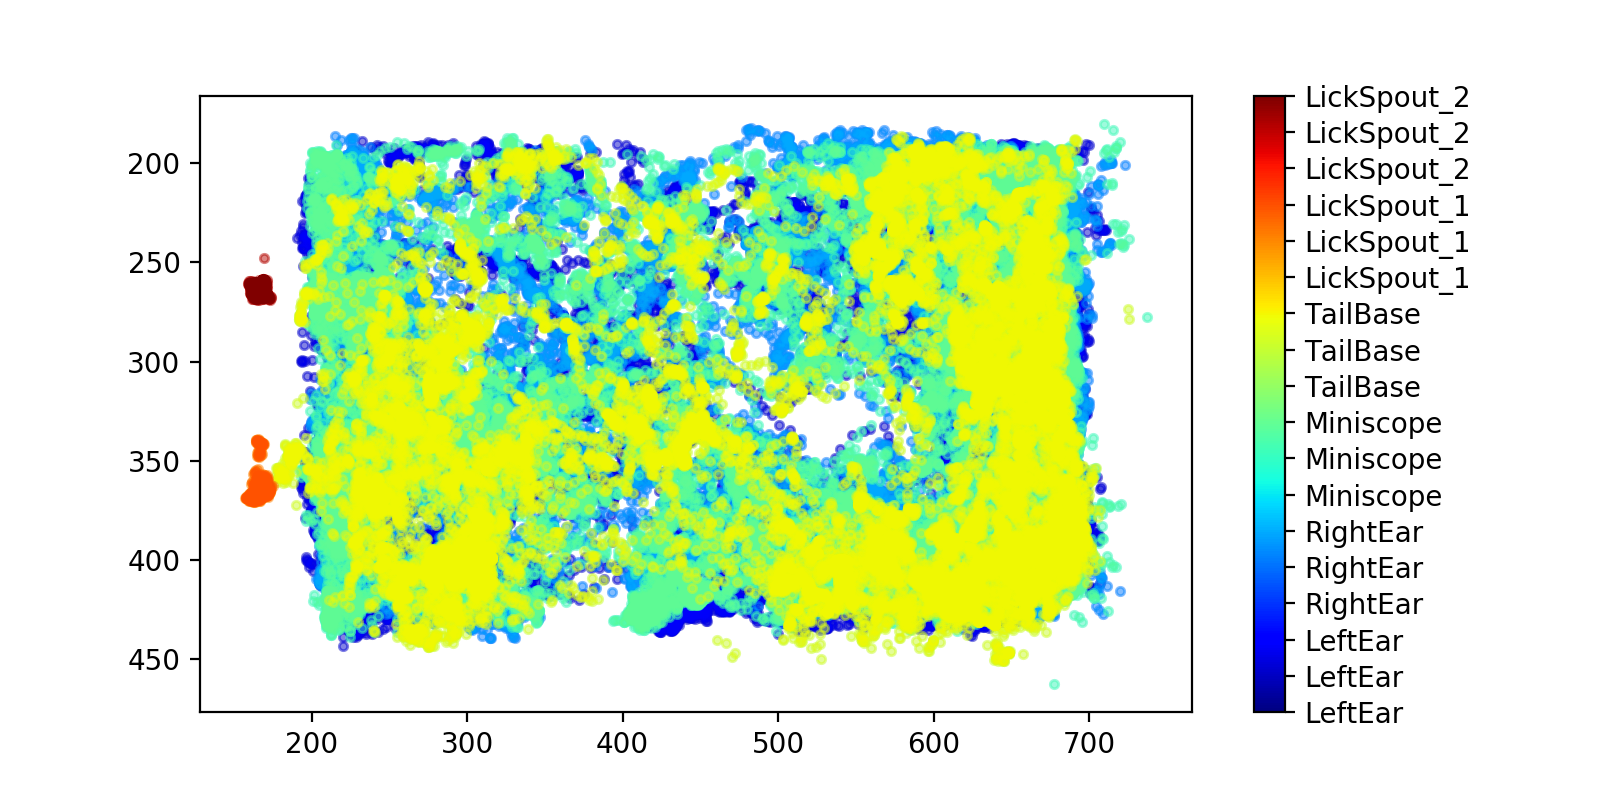

<IPython.core.display.Javascript object>


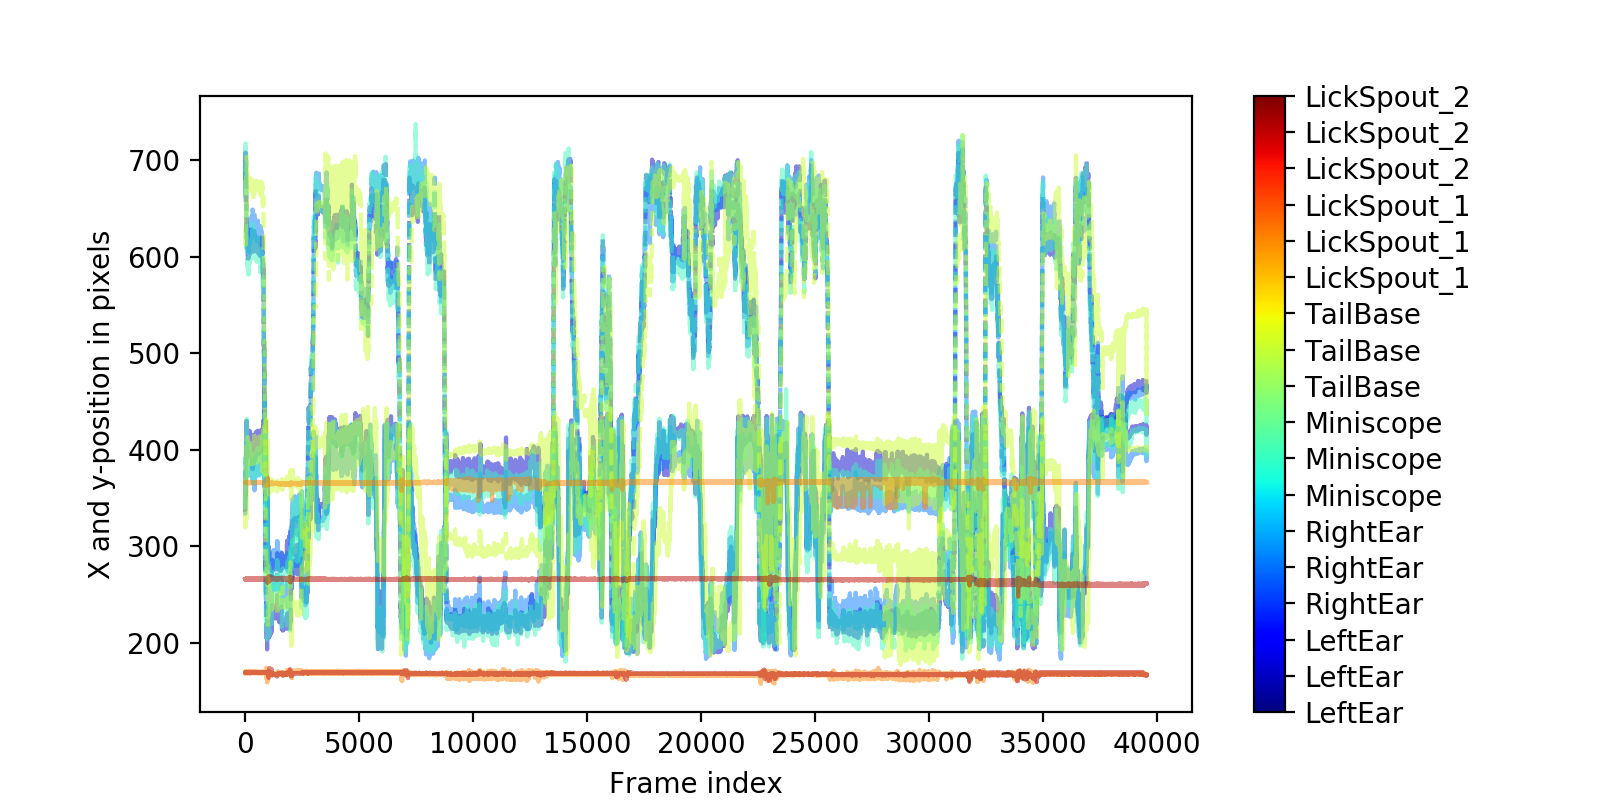

<IPython.core.display.Javascript object>


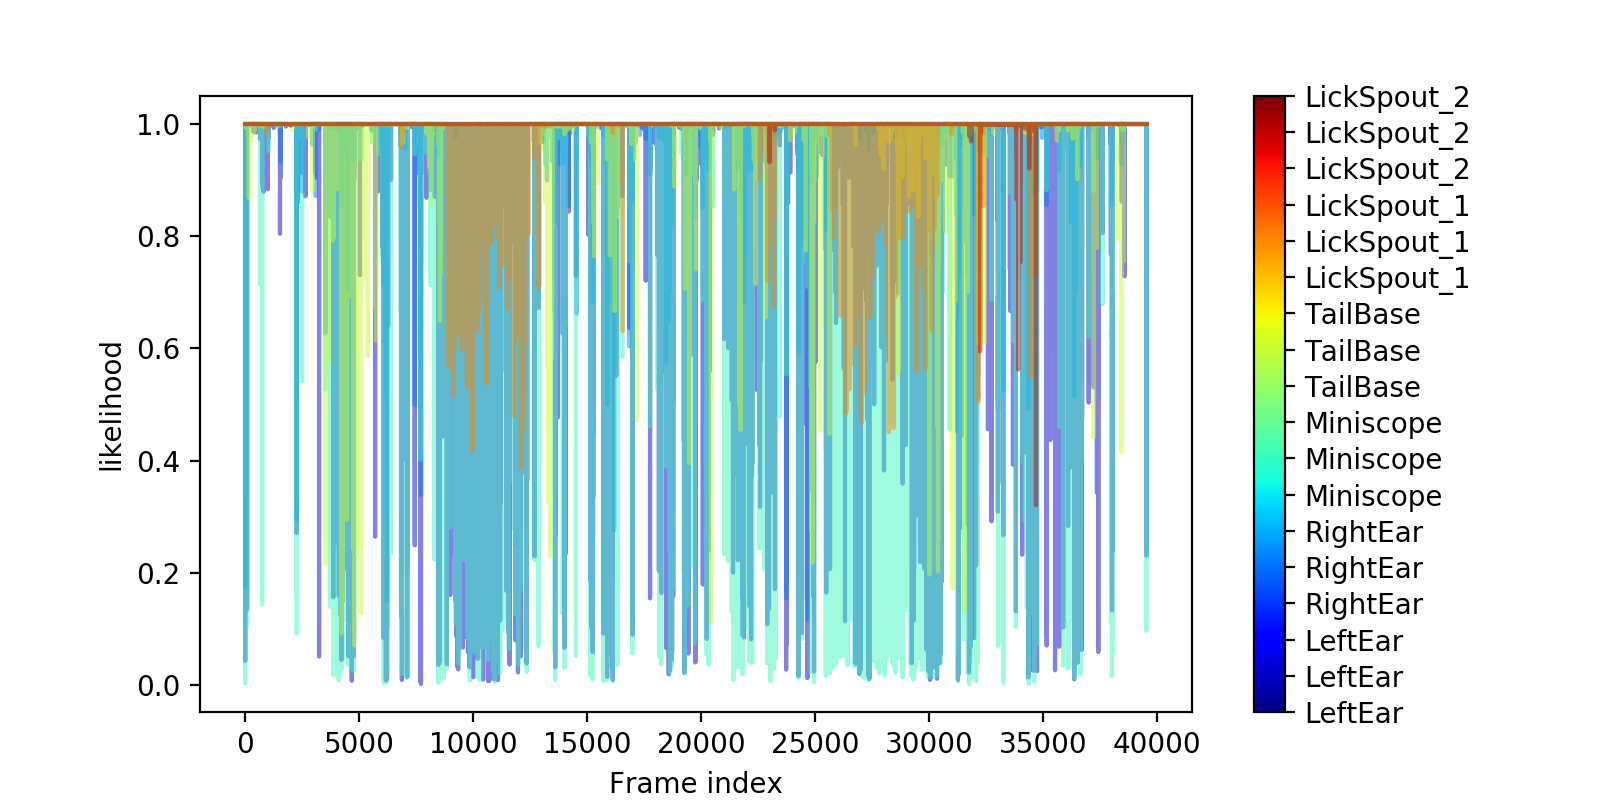

<IPython.core.display.Javascript object>


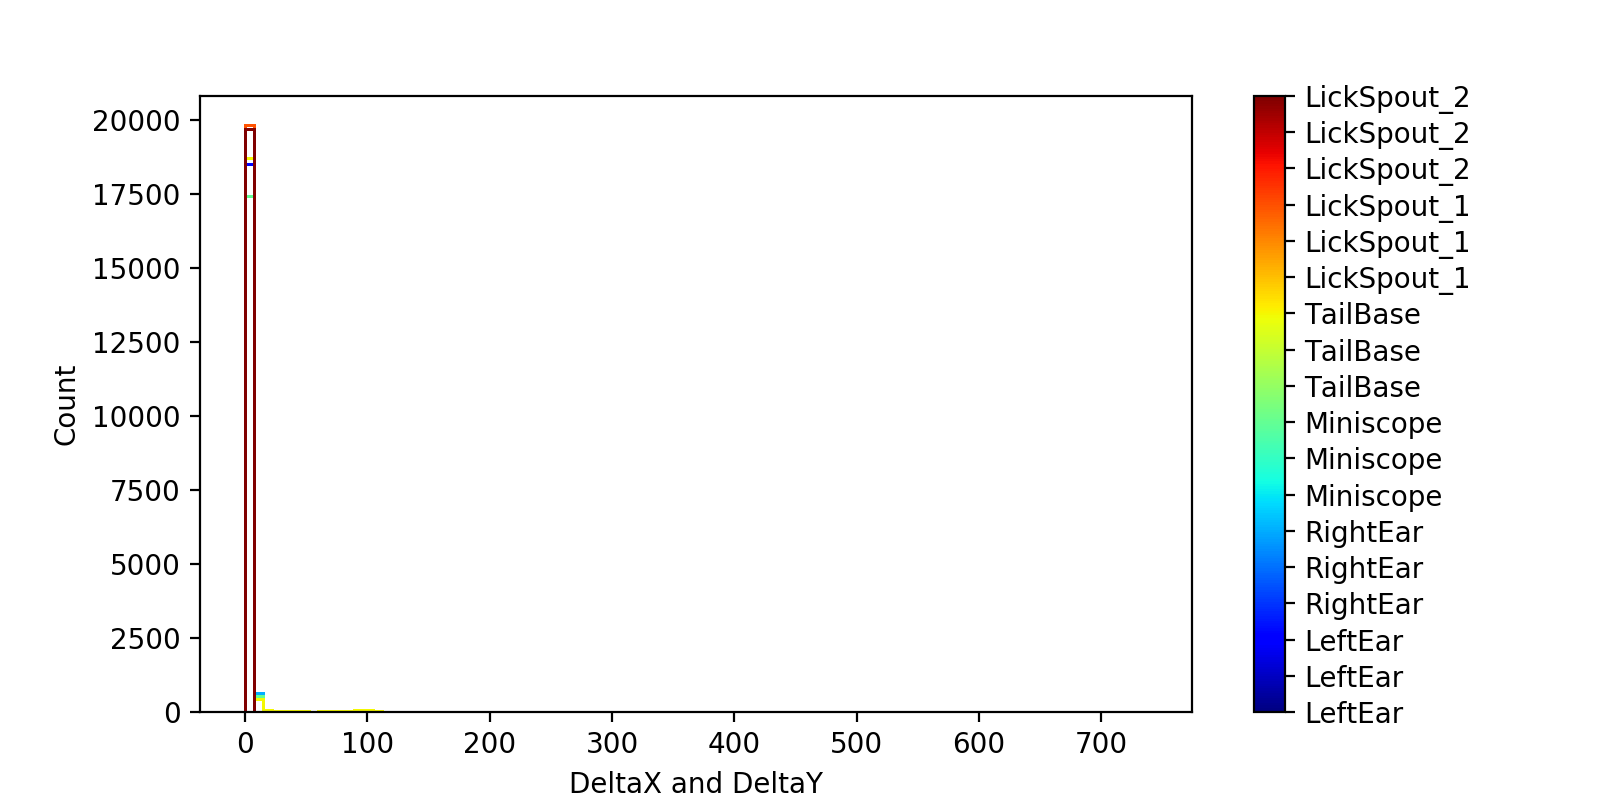

In [15]:
bodyparts=Dataframe.columns.get_level_values(1) #you can read out the header to get body part names!

bodyparts2plot=bodyparts #you could also take a subset, i.e. =['snout']

%matplotlib notebook
PlottingResults(Dataframe,bodyparts2plot,alphavalue=.2,pcutoff=.5,fs=(8,4))

# These plots can are interactive and can be customized (see https://matplotlib.org/) [in the code above]
# note that the snout and other bpts jitter in this example that was not trained for long.

## Great so let's use Federico's code for ROI analysis

Functions to extract time spent by the mouse in each of a list of user defined ROIS!

https://github.com/AlexEMG/DLCutils/blob/master/time_in_each_roi.py

In [7]:
# First, select a bodypart that you want to work with.
bodyparts_list = bodyparts[0:-1:3]
bodyparts_list

Index(['LeftEar', 'RightEar', 'Miniscope', 'TailBase', 'LickSpout_1',
       'LickSpout_2'],
      dtype='object', name='bodyparts')

In [92]:
import time_in_each_roi #the function needs to be in the same folder as the notebook

#let's calculate velocity of the snount

bpt=bodyparts_list[0]
vel = time_in_each_roi.calc_distance_between_points_in_a_vector_2d(np.vstack([Dataframe[DLCscorer][bpt]['x'].values.flatten(), Dataframe[DLCscorer][bpt]['y'].values.flatten()]).T)

fps=30 # frame rate of camera in those experiments
time=np.arange(len(vel))*1./fps
vel=vel #notice the units of vel are relative pixel distance [per time step]

# ---------------comment out--------------------
# # store in other variables:
# xsnout=Dataframe[DLCscorer][bpt]['x'].values
# ysnout=Dataframe[DLCscorer][bpt]['y'].values
# vsnout=vel

# ----------------modified by Hung---------
# Create variable names, or just different columns in a new dataframe?:
Dataframe_ROI = pd.DataFrame()
Dataframe_ROI[bpt+'x']=Dataframe[DLCscorer][bpt]['x'].values
Dataframe_ROI[bpt+'y']=Dataframe[DLCscorer][bpt]['y'].values
Dataframe_ROI[bpt+'v']=vel

Dataframe_ROI.head()

,LeftEarx,LeftEary,LeftEarv
0,682.683044,337.612366,0.000000
1,682.173828,337.610779,0.509219
2,683.939331,340.512939,3.396989
3,686.520691,333.688080,7.296720
4,679.789185,332.640106,6.812593


<IPython.core.display.Javascript object>


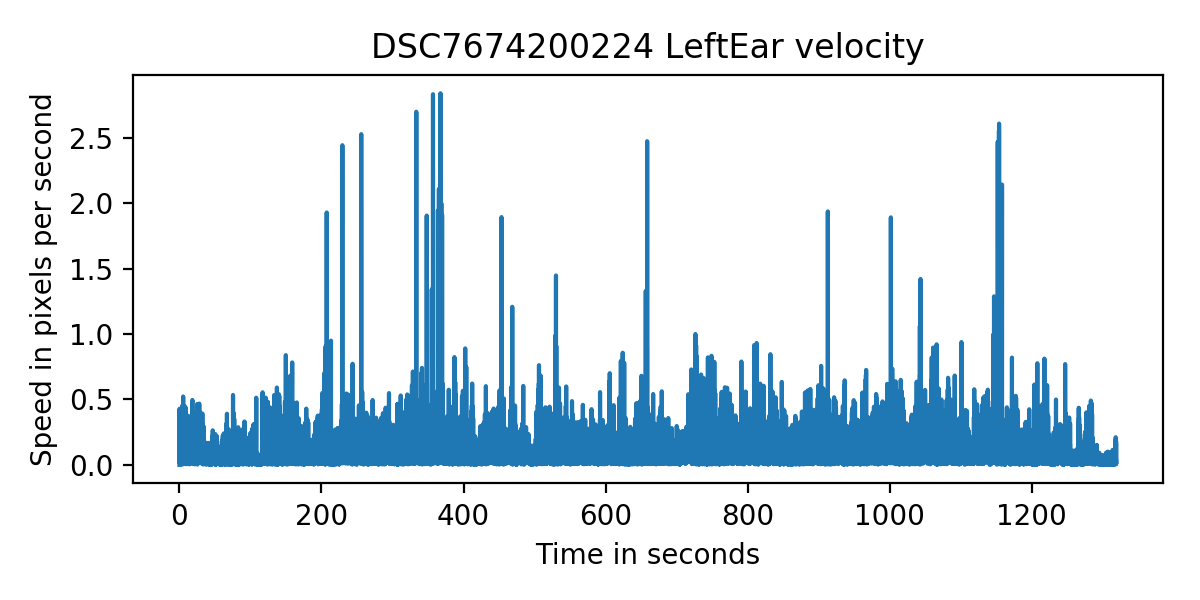

In [93]:
%matplotlib notebook
plt.figure(figsize=(6,3))
plt.plot(time,Dataframe_ROI[bpt+'v']*1./fps)
plt.title(str(Path(video).stem)+' '+bpt+' velocity')
plt.xlabel('Time in seconds')
plt.ylabel('Speed in pixels per second')
plt.tight_layout()
plt.show()

In [94]:
#define bounding boxes (here for left and right side of treadmill, displayed below)
from collections import namedtuple
position = namedtuple('position', ['topleft', 'bottomright'])
#bp_tracking = np.array((xsnout, ysnout, vsnout))
bp_tracking = np.array((Dataframe_ROI[bpt+'x'], Dataframe_ROI[bpt+'y'], Dataframe_ROI[bpt+'v']))

#two points defining each roi: topleft(X,Y) and bottomright(X,Y).
rois = {'leftside': position((175, 170), (300, 460)),'rightside': position((300, 170), (740, 460))} 
print(rois)
# Check this again since the y axis is usually flipped in DLC data/plt.plot()

{'leftside': position(topleft=(175, 170), bottomright=(300, 460)), 'rightside': position(topleft=(300, 170), bottomright=(740, 460))}


<IPython.core.display.Javascript object>


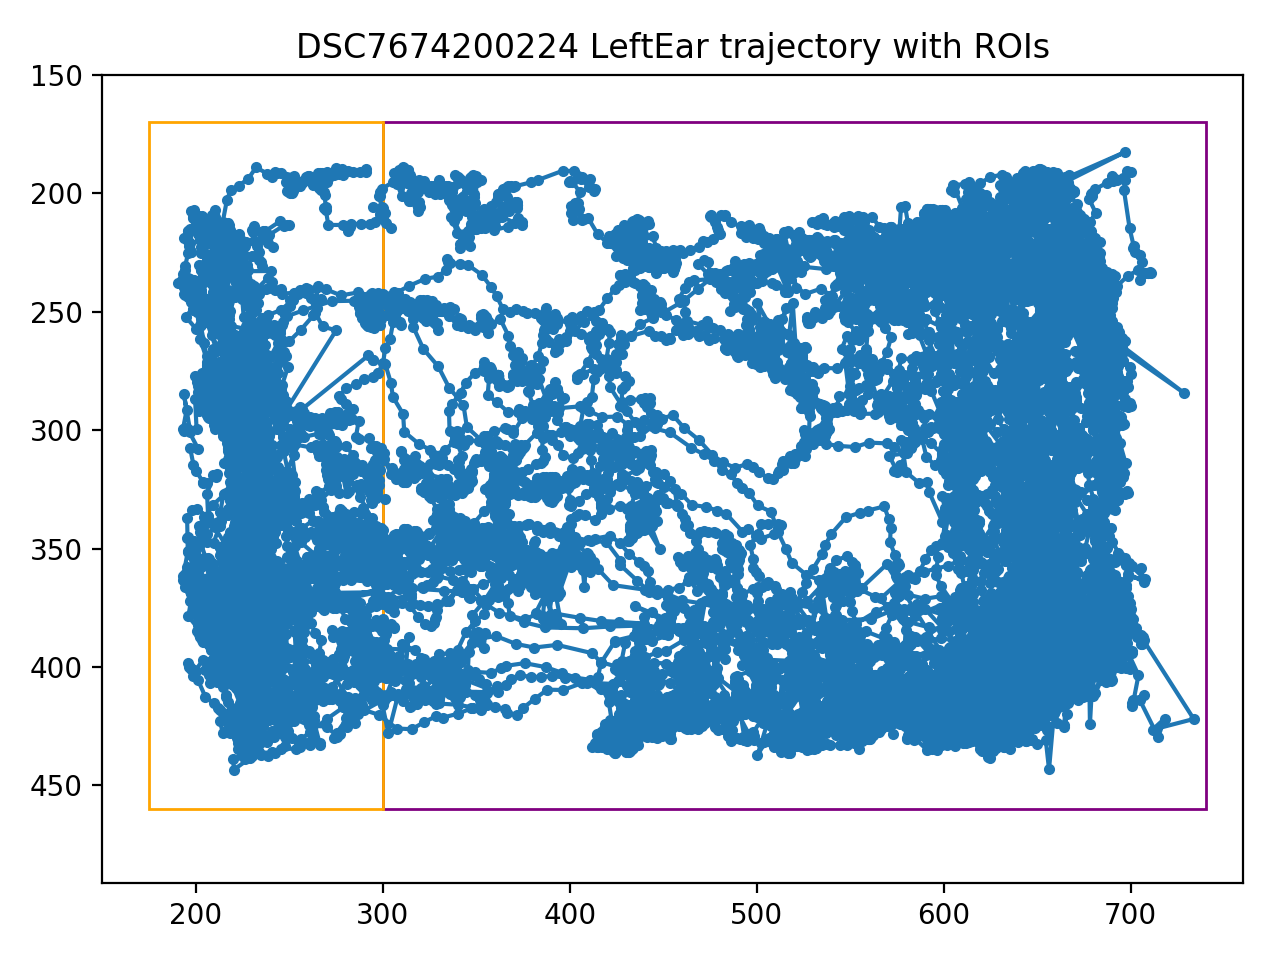

In [100]:
import matplotlib.patches as patches
fig,ax = plt.subplots(1)

#plot snout + bounding boxes for rois
plt.plot(Dataframe_ROI[bpt+'x'],Dataframe_ROI[bpt+'y'],'.-')
plt.title(str(Path(video).stem)+' '+bpt+' trajectory with ROIs')
rect = patches.Rectangle(rois['rightside'].topleft,rois['rightside'].bottomright[0]-rois['rightside'].topleft[0],rois['rightside'].bottomright[1]-rois['rightside'].topleft[1],linewidth=1,edgecolor='purple',facecolor='none')
ax.add_patch(rect)
rect = patches.Rectangle(rois['leftside'].topleft,rois['leftside'].bottomright[0]-rois['leftside'].topleft[0],rois['leftside'].bottomright[1]-rois['leftside'].topleft[1],linewidth=1,edgecolor='orange',facecolor='none')
ax.add_patch(rect)
plt.xlim(150,760)
plt.ylim(150,491)
plt.gca().invert_yaxis() # Just to align the plot with real camera settings
plt.tight_layout()
plt.show()

In [96]:
import time_in_each_roi #the function needs to be in the same folder as the notebook

res = time_in_each_roi.get_timeinrois_stats(bp_tracking.T, rois, fps=30, check_inroi=True)

#print results:
res

{'avg_time_in_roi': {'leftside': 51.71111111111111,
  'none': 348.85714285714283,
  'rightside': 803.0526315789474,
  'tot': 1203.6208855472014},
 'avg_time_in_roi_sec': {'leftside': 1.7237037037037035,
  'none': 11.628571428571428,
  'rightside': 26.76842105263158,
  'tot': 40.12069618490671},
 'avg_vel_in_roi': {'leftside': 3.199691067000353,
  'none': 2.7358996632257004,
  'rightside': 2.8857486063893076,
  'tot': 8.821339336615361},
 'cumulative_time_in_roi': {'leftside': 15258,
  'none': 2327,
  'rightside': 21978,
  'tot': 39563},
 'cumulative_time_in_roi_sec': {'leftside': 508.6,
  'none': 77.56666666666666,
  'rightside': 732.6,
  'tot': 1318.7666666666667},
 'transitions_per_roi': {'leftside': 45,
  'none': 63,
  'rightside': 19,
  'tot': 127}}

In [97]:
# Now, plot the scatter plot with density
# libraries
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import kde

# create data
#x = np.random.normal(size=500)
#y = x * 3 + np.random.normal(size=500)

x = Dataframe_ROI[bpt+'x']
y = Dataframe_ROI[bpt+'y']

# Evaluate a gaussian kde on a regular grid of nbins x nbins over data extents
nbins=300
k = kde.gaussian_kde([x,y])
xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))

<IPython.core.display.Javascript object>


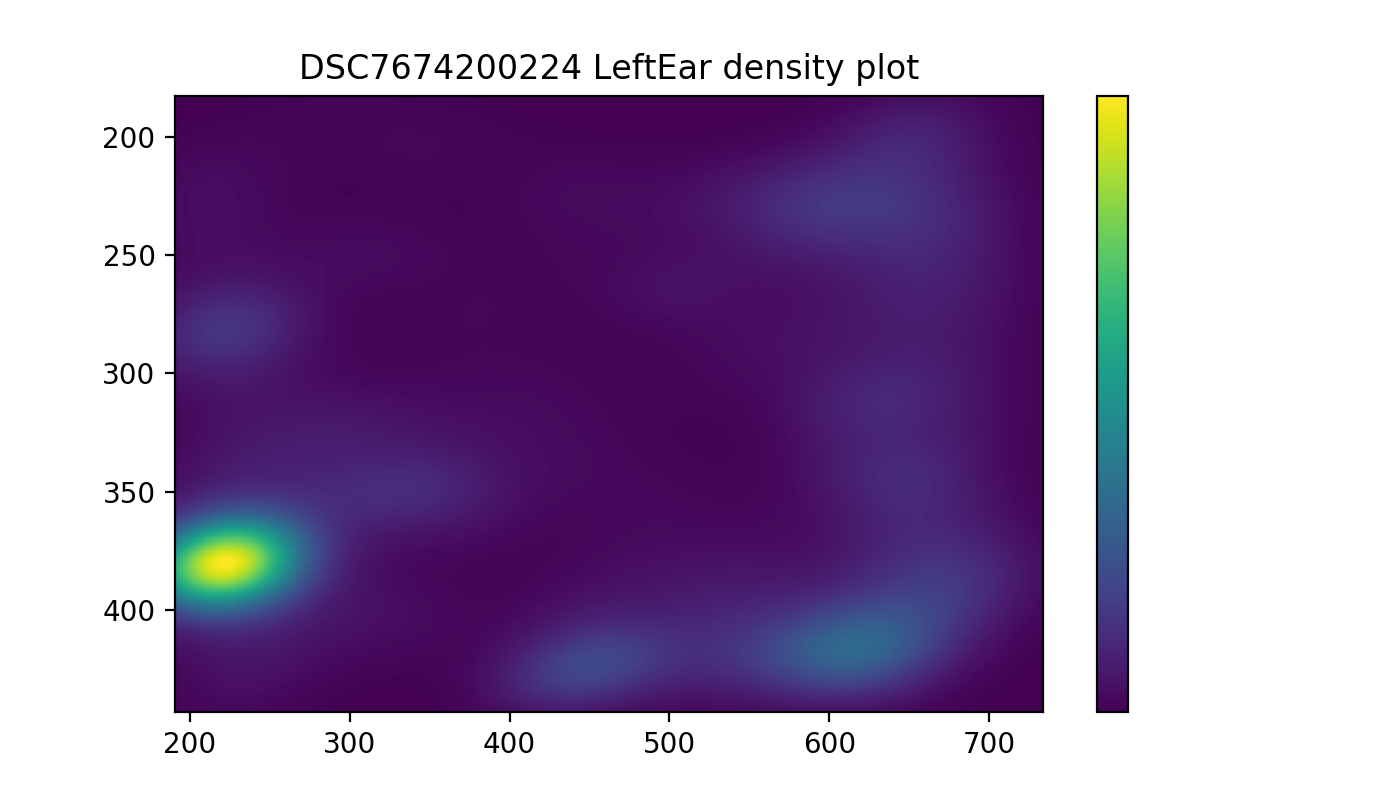

In [98]:
fig,ax = plt.subplots(figsize=(7,4))

# Make the plot
_ = ax.pcolormesh(xi, yi, zi.reshape(xi.shape),cmap='viridis')
cbar = fig.colorbar(_, ax=ax)
cbar.set_ticks([])

plt.gca().invert_yaxis() # Just to align the plot with real camera settings
plt.title(str(Path(video).stem)+' '+bpt+' density plot')
plt.show()


<IPython.core.display.Javascript object>


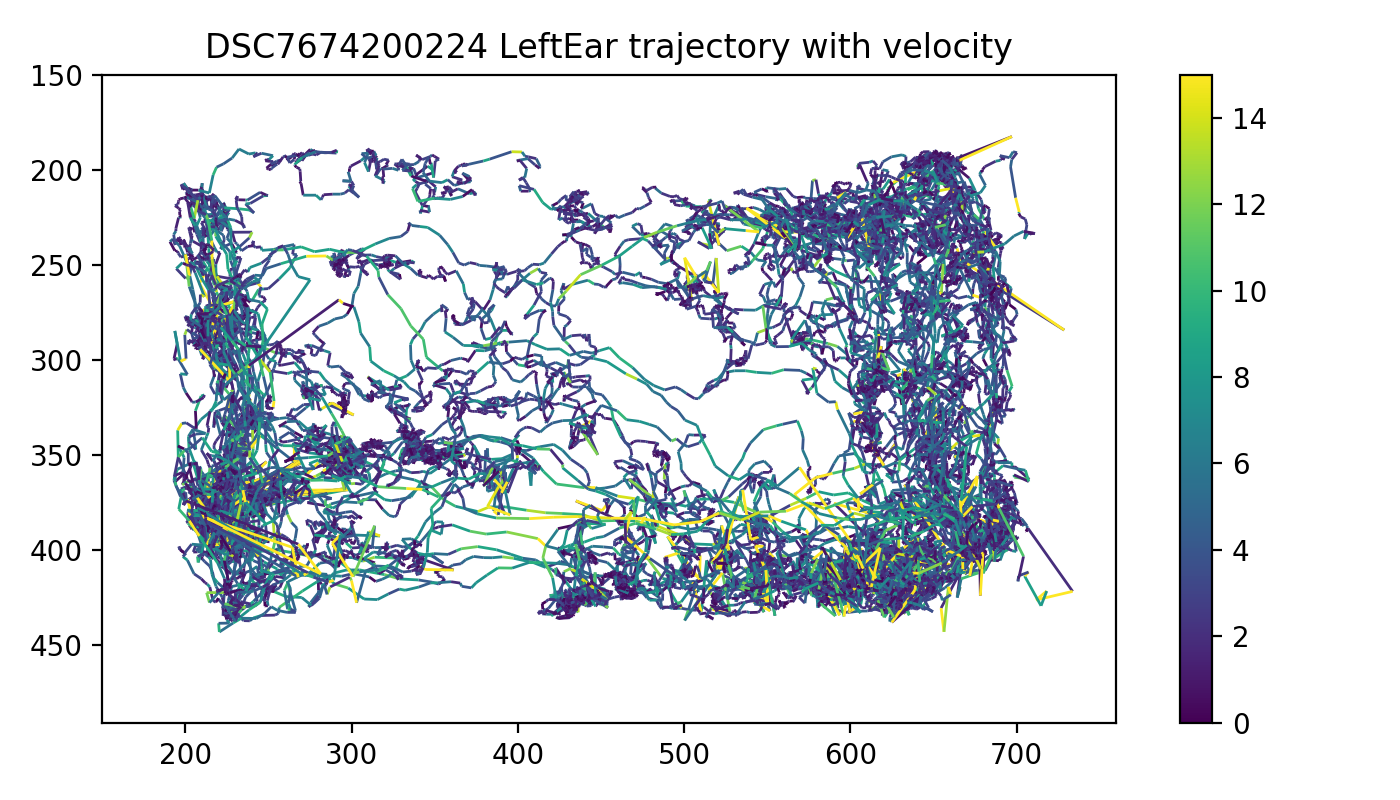

In [102]:
# Now let's plot the trajectory with velocity (color coding)

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm

x = Dataframe_ROI[bpt+'x']
y = Dataframe_ROI[bpt+'y']
v = Dataframe_ROI[bpt+'v']

# Create a set of line segments so that we can color them individually
# This creates the points as a N x 1 x 2 array so that we can stack points
# together easily to get the segments. The segments array for line collection
# needs to be (numlines) x (points per line) x 2 (for x and y)
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

# Plotting
fig, ax = plt.subplots(figsize=(7,4))

# Create a continuous norm to map from data points to colors
norm = plt.Normalize(v.min(), v.max())
norm = plt.Normalize(v.min(), 15)
lc = LineCollection(segments, cmap='viridis', norm=norm)
# Set the values used for colormapping
lc.set_array(v)
lc.set_linewidth(1)
line = ax.add_collection(lc)
fig.colorbar(line, ax=ax)

# Setting lim here is important, otherwise can't show fig properly
ax.set_xlim(x.min(), x.max())
ax.set_ylim(y.min(), y.max())

plt.xlim(150,760)
plt.ylim(150,491)

plt.gca().invert_yaxis() # Just to align the plot with real camera settings
plt.title(str(Path(video).stem)+' '+bpt+' trajectory with velocity')
plt.tight_layout()
plt.show()

In [ ]:
# With the upper figure, I think it's important that we need to remove uncertian points from DLC data.
# Ideally I should remove points that have <0.95 likelihood, and interpolate.
# Definitely can find something from NumPy or SciPy, but for some other time.